In [1]:
import keras 
from keras import layers
import tensorflow as tf

True
Found 1488 images belonging to 2 classes.
Found 495 images belonging to 2 classes.
Found 498 images belonging to 2 classes.


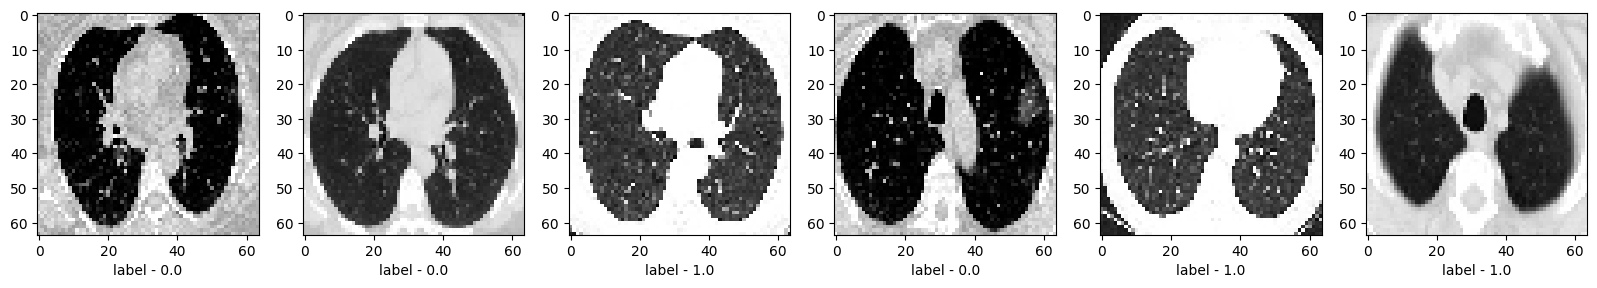

In [2]:
%run data_input.ipynb

In [3]:
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(1488, 64, 64, 1)
(495, 64, 64, 1)
(498, 64, 64, 1)


In [ ]:
# encoder_model = tf.keras.models.Sequential([
#     tf.keras.layersConv2D(64, (3, 3), activation='relu', input_shape=(300, 300)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layersConv2D(32, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layersConv2D(16, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
    
    
# ])
    
# decoder_model = tf.keras.models.Sequential([
#     tf.keras.layersConv2D(16, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layersConv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layersConv2D(32, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2)
# ])

In [8]:
import numpy as np

In [9]:
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_valid = x_valid.astype('float32') / 255.
image_dims = (64, 64, 1)
x_train = np.reshape(x_train, (len(x_train), image_dims[0], image_dims[1], image_dims[2]))
x_test = np.reshape(x_test, (len(x_test), image_dims[0], image_dims[1], image_dims[2]))
x_valid = np.reshape(x_valid, (len(x_valid), image_dims[0], image_dims[1], image_dims[2]))
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)


(1488, 64, 64, 1)
(495, 64, 64, 1)
(498, 64, 64, 1)


In [10]:
input_img = keras.Input(shape=image_dims)

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
import datetime

In [12]:
%load_ext tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=16,
                shuffle=True,
                validation_data=(x_valid, x_valid),
                callbacks=[tensorboard_callback])

Epoch 1/15


ValueError: in user code:

    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.8/dist-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.8/dist-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/losses.py", line 1807, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/usr/local/lib/python3.8/dist-packages/keras/backend.py", line 5158, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((16, 60, 60, 1) vs (16, 64, 64, 1)).


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import random

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10   # How many digits we will display
start = randam.randint(50, 1000)
plt.figure(figsize=(20, 4))
for i in range(start, start+n):
    # Display original
    ax = plt.subplot(2, n, i + 1 - start)
    plt.imshow(x_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n - start)
    plt.imshow(decoded_img[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
%tensorboard --logdir logs

In [5]:
image_dims = (64, 62, 1)
print(image_dims[1])

62
